# Exploaratory Data Analysis Churn Dataset

In [0]:
%matplotlib inline 
from IPython.display import Image
import matplotlib as mlp
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
##sns.set_style("darkgrid")

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)  

DEBUG = False

import os
for d in ['src','data','output']: os.makedirs(d, exist_ok=True)

In [46]:
for filename in ['churn.csv','states.csv']:
    source = f"https://kmurphy.bitbucket.io/modules/Data_Mining_2/topics/01-Module_Introduction/20-Practical_01_-_Review_of_Pandas_-_Churn/files/{filename}"
    target = f"src/{filename}"

    if not os.path.isfile(target):
        print (f"Downloading remote file {filename}", sep="")
        import urllib.request
        urllib.request.urlretrieve(source, target)
    else:
        print(f"Using local copy of {filename}")

Using local copy of churn.csv
Using local copy of states.csv


In [47]:
df = pd.read_csv("src/churn.csv")
display(df.shape)
df.head()

(3333, 21)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [48]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,21
Number of observations,3333
Total Missing (%),0.0%
Total size in memory,546.9 KiB
Average record size in memory,168.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),1
Rejected,4


In [49]:
names = df.columns.tolist()
print("Original columns names:\n", names)

Original columns names:
 ['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?']


In [50]:
CORRECTIONS = {" ":"_", "'":"", "?":"", "CustServ":"Cust_Serv"}

def fixName(s):
    for a,b in CORRECTIONS.items():
        s = s.replace(a,b)
    return s

mapping = {c:fixName(c) for c in names}
mapping

{'Account Length': 'Account_Length',
 'Area Code': 'Area_Code',
 'Churn?': 'Churn',
 'CustServ Calls': 'Cust_Serv_Calls',
 'Day Calls': 'Day_Calls',
 'Day Charge': 'Day_Charge',
 'Day Mins': 'Day_Mins',
 'Eve Calls': 'Eve_Calls',
 'Eve Charge': 'Eve_Charge',
 'Eve Mins': 'Eve_Mins',
 "Int'l Plan": 'Intl_Plan',
 'Intl Calls': 'Intl_Calls',
 'Intl Charge': 'Intl_Charge',
 'Intl Mins': 'Intl_Mins',
 'Night Calls': 'Night_Calls',
 'Night Charge': 'Night_Charge',
 'Night Mins': 'Night_Mins',
 'Phone': 'Phone',
 'State': 'State',
 'VMail Message': 'VMail_Message',
 'VMail Plan': 'VMail_Plan'}

In [0]:
df.rename(columns=mapping, inplace=True)

In [0]:
df.drop(columns=["Phone"], inplace=True)

In [0]:
df.drop(columns=["Day_Charge", "Eve_Charge", "Night_Charge", "Intl_Charge"], inplace=True)

In [0]:
df.Churn = df.Churn.map( {"False.":"no", "True.":"yes"} )

In [55]:
df.head()

,State,Account_Length,Area_Code,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [0]:
df.to_csv("data/churn.csv", index=False)

In [37]:
df = pd.read_csv('src/states.csv')
display(df.shape)
df.head()

(52, 4)

,state,latitude,longitude,name
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [60]:
df.columns = [c.title() for c in  df.columns]
df.head()
##df.to_csv("data/states.csv", index=False)

,State,Account_Length,Area_Code,Intl_Plan,Vmail_Plan,Vmail_Message,Day_Mins,Day_Calls,Eve_Mins,Eve_Calls,Night_Mins,Night_Calls,Intl_Mins,Intl_Calls,Cust_Serv_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False.
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False.
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False.
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False.
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False.


In [84]:
y = df["Churn"].value_counts()
print(y)

False.    2850
True.      483
Name: Churn, dtype: int64


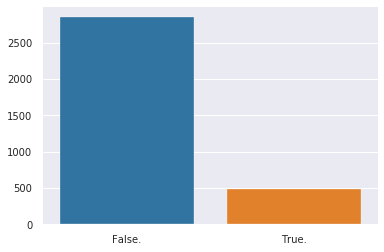

In [88]:
sns.barplot(y.index, y.values)


#plt.show()